<a href="https://colab.research.google.com/github/BorisMejiasII/NeuralNetworksII/blob/main/Laboratorio1_Red_Neuronal(Boris_Mej%C3%ADas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [8]:
#Realizando imports de tensoflow
from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)


Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


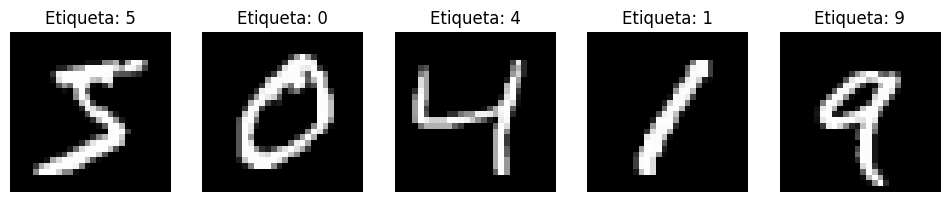

In [9]:
import matplotlib.pyplot as plt

# COMPLETA AQUÍ: Visualización de imágenes con sus etiquetas
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Etiqueta: {y_train[i]}")
    ax.axis('off')
plt.show()



## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:**
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [11]:
from tensorflow.keras.utils import to_categorical

# COMPLETA AQUÍ: Normalización, flattening y codificación one-hot
# 1) Normalizar
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# 2) flattering
x_train = x_train.reshape(-1, 28*28)
x_test  = x_test.reshape(-1, 28*28)

# 3) One-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)




## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:**
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# COMPLETA AQUÍ: Definición y compilación del modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # capa oculta con de 128 neuronas
    Dense(10, activation='softmax')                     # capa de salida con solo 10 clases (Números)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


In [6]:
# COMPLETA AQUÍ: Entrenamiento del modelo
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

Epoch 1/5
1688/1688 - 8s - 5ms/step - accuracy: 0.9215 - loss: 0.2731 - val_accuracy: 0.9653 - val_loss: 0.1223
Epoch 2/5
1688/1688 - 9s - 6ms/step - accuracy: 0.9631 - loss: 0.1238 - val_accuracy: 0.9728 - val_loss: 0.0914
Epoch 3/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9746 - loss: 0.0844 - val_accuracy: 0.9727 - val_loss: 0.0927
Epoch 4/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9810 - loss: 0.0634 - val_accuracy: 0.9765 - val_loss: 0.0796
Epoch 5/5
1688/1688 - 9s - 5ms/step - accuracy: 0.9860 - loss: 0.0474 - val_accuracy: 0.9760 - val_loss: 0.0794



## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.


In [7]:
# COMPLETA AQUÍ: Evaluación del modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Precisión en test: {test_acc:.4f}, Pérdida en test: {test_loss:.4f}")

Precisión en test: 0.9721, Pérdida en test: 0.0882


## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

In [ ]:
# La codificación one-hot permite representar las categorías de manera que la salida de la red pueda interpretarse fácilmente como probabilidades mutuamente
# exclusivas — cada vector tiene un ‘1’ en la posición de la clase correcta y ‘0’ en las demás — lo que facilita el uso de la función de pérdida +
# categorical_crossentropy y evita ordinalidades artificiales.

### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

In [ ]:
# Aumentar neuronas suele incrementar la capacidad del modelo para aprender patrones complejos, reduciendo el sesgo pero con riesgo de sobreajuste si hay
# demasiados parámetros.

# Disminuir neuronas puede mejorar la capacidad de generalización (menos sobreajuste) pero puede provocar subajuste si no hay suficiente capacidad#
# para capturar la complejidad de los datos.

### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

In [ ]:
# Una buena alternativa es SGD con momentum. Aunque converge más lento que Adam, en algunos casos ofrece mejor generalización y menos tendencia a quedarse en
# mínimos locales. También podrías probar RMSprop, que adapta las tasas de aprendizaje por parámetro de manera similar a Adam.

### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

In [ ]:
# Mejora inicial: más épocas suelen bajar la pérdida y subir la precisión hasta cierto punto.

# Riesgo: tras cierto número de épocas, el modelo comienza a sobreajustarse al set de entrenamiento y empeora en el set de prueba (aumento de la brecha entre entrenamiento y validación).

### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

In [ ]:
# Separar datos en entrenamiento y prueba permite medir de manera objetiva la capacidad de generalización del modelo: se entrena con un subconjunto y
# se evalúa en datos nunca vistos. Sin esta división, no sabríamos si el modelo ha aprendido patrones reales o simplemente memorizó los ejemplos de
# entrenamiento.